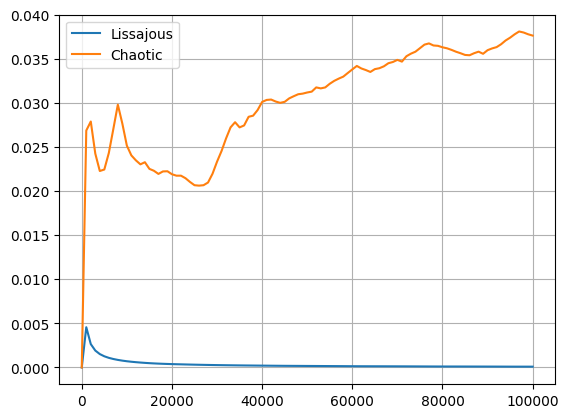

In [ ]:
from numiphy.symlib.expressions import *
from numiphy.odesolvers import *
import matplotlib.pyplot as plt

def g(x0):
    return [x0, 0, 0, (2 - 2*Vfunc(x0, 0) - 0**2)**0.5]

t, x, y = variables('t, x, y')
eps = 0.35
a = -Rational(1, 3)

V = x**2/2 + y**2/2 + eps*(x*y**2 + a*x**3)
ch = HamiltonianSystem(V, x, y)

Vfunc = V.lambdify([x, y])
orb1 = ch.new_varorbit(g(0.5))
orb2 = ch.new_varorbit(g(-0.05))

orb1.get(100000, 0.01, err=1e-10, max_frames=2, split=100)
orb2.get(100000, 0.01, err=1e-10, max_frames=2, split=100)

t1, ind1 = orb1.lyapunov
t2, ind2 = orb2.lyapunov

fig, ax = plt.subplots()
ax.plot(t1, ind1, label='Lissajous')
ax.plot(t2, ind2, label='Chaotic')
ax.grid(True)
ax.legend()

In [ ]:
from numiphy.symlib.expressions import *
from numiphy.odesolvers import *
import matplotlib.pyplot as plt

t, x, y, px, py = variables('t, x, y, px, py')

symode = SymbolicOde(px, py, -x, -y, symbols=[t, x, y, px, py])
ode_fast = symode.to_lowlevel(stack=True)
ode_mid = symode.to_lowlevel(stack=False)
ode_slow = symode.to_python()
res: dict[ODE, OdeResult] = {ode_slow: None, ode_mid: None, ode_fast: None}
for ode in res:
    ics = (0, [1.3, -2.4, 3.7, 0.2])
    res[ode] = ode.solve(ics, 500, 0.1, err=1e-8, method='RK4')
    print(round(res[ode_slow].runtime / res[ode].runtime, 2), " times faster than the equivalent python code")

#normalized runtimes should be: 1, ~40 , ~150

In [ ]:
np.all(res[ode_fast].func == res[ode_slow].func) #should be true. C++ and python implementation of the adaptive RK4 method are identical for numbers of the same precision.

In [1]:
from numiphy.symlib.expressions import *
from numiphy.odesolvers import *
import time

t, x, y, px, py = variables('t, x, y, px, py')

symode = SymbolicOde(px, py, -x, -y, symbols=[t, x, y, px, py])
ode_fast = symode.to_lowlevel(stack=True)
ode_slow = symode.to_python()


params = 12*[dict(ics = (0, [1.3, -2.4, 3.7, 0.2]), t=500, dt=0.1, err=1e-10, method='RK4', max_frames=1000, args=())]

t1 = time.time()
r_fast = ode_fast.solve_all(params, threads=-1)
t2 = time.time()
r_slow = ode_fast.solve_all(params, threads=1)
t3 = time.time()
r_python = ode_slow.solve_all(params)
t4 = time.time()
print(f'Multithreaded Low level ode was {(t3-t2)/(t2-t1)} times faster than single threaded,')
print(f'while it was {(t4-t3)/(t2-t1)} times faster than the pythonic implementation\n')
print(f'Singlethreaded Low level ode was {(t4-t3)/(t3-t2)} times faster than the pythonic implementation.\n')


Compiling ODE...
Done
Multithreaded Low level ode was 3.660939936149677 times faster than single threaded,
while it was 707.9947360605836 times faster than the pythonic implementation

Singlethreaded Low level ode was 193.39151922967721 times faster than the pythonic implementation.

